# Title : Crop Recommendation with AI 
<img src="./pics/AI_Crop.jpeg" alt="picture" style="width: 900px;"/>

###  Introduction
The Purpose  of this project is to help agricultural farmers to get informed decisions about the farming strategy. To do this,   a dataset obtained from a Kaggle expert named Atharva Ingle was used. The dataset was used to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

It is important  to note that Atharva Ingle built the dataset by augmenting datasets of rainfall, climate and fertilizer data available for India.

#### Data field  
* N - ratio of Nitrogen content in soil 
* P - ratio of Phosphorous content in soil  
* K - ratio of Potassium content in soil  
* Temperature - temperature in degree Celsius  
* Humidity - relative humidity in %  
* Ph - ph value of the soil. Soils can be classified according to their pH value: 6.5 to 7.5—neutral, over 7.5—alkaline and less than 6.5—acidic
* Rainfall - rainfall in mm
* Lable - 22 Crops each with 100 observations   
##### The crops include :   
1. Rice  
2. Black Grams   
3. Banana   
4. Jute   
5. Coconut   
6. Apple   
7. Papaya   
8. Muskmelon   
9. Grapes   
10. Watermelon   
11. Kidney Beans  
12. Mung Beans   
13. Oranges   
14. Chick Peas   
15. Lentils   
16. Cotton   
17. Maize   
18. Moth Beans   
19. Pigeon Peas   
20. Mango   
21. Pomegranate   
22. Coffee 


#    1. Prepare Problem
### 1a. Load libraries (pandas, matplotlib, sklearn, etc)


In [172]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

### 1b. Load dataset (read_csv)

In [173]:
import pandas as pd
import numpy as np
import os
working_directory = os.getcwd()
print(working_directory) 


/Users/herbertifeanyichukwuukaegbu


In [174]:
path = working_directory + '/data/Crop_recommendation.csv'
df = pd.read_csv(path)

# 2. Summarize Data

## 2a) Summarize Dataset (Dimension, Data type )

### A look at the data


In [175]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.9,82.0,6.5,202.9,rice
1,85,58,41,21.8,80.3,7.0,226.7,rice
2,60,55,44,23.0,82.3,7.8,264.0,rice
3,74,35,40,26.5,80.2,7.0,242.9,rice
4,78,42,42,20.1,81.6,7.6,262.7,rice


In [176]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.8,66.4,6.8,177.8,coffee
2196,99,15,27,27.4,56.6,6.1,127.9,coffee
2197,118,33,30,24.1,67.2,6.4,173.3,coffee
2198,117,32,34,26.3,52.1,6.8,127.2,coffee
2199,104,18,30,23.6,60.4,6.8,140.9,coffee


### Dimensions

In [177]:
df.size

17600

In [178]:
df.shape

(2200, 8)

In [179]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [180]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Data Type of all attributes

In [1]:
df.dtypes


NameError: name 'df' is not defined

## 2 b) Descriptive statistics (mean and distribution)

In [182]:
# Statistical Summary
pd.set_option('precision',1)
print(df.describe())

            N       P       K  temperature  humidity      ph  rainfall
count  2200.0  2200.0  2200.0       2200.0    2200.0  2200.0    2200.0
mean     50.6    53.4    48.1         25.6      71.5     6.5     103.5
std      36.9    33.0    50.6          5.1      22.3     0.8      55.0
min       0.0     5.0     5.0          8.8      14.3     3.5      20.2
25%      21.0    28.0    20.0         22.8      60.3     6.0      64.6
50%      37.0    51.0    32.0         25.6      80.5     6.4      94.9
75%      84.2    68.0    49.0         28.6      89.9     6.9     124.3
max     140.0   145.0   205.0         43.7     100.0     9.9     298.6



* Average Ratio of Nitrogen in the Soil : 50.6  
* Average Ratio of Phosphorous in the Soil : 53.4  
* Average Ratio of Potassium in the Soil : 48.1  
* Average Tempature in Celsius : 25.6  
* Average Relative Humidity in % : 71.5  
* Average PH Value of the soil : 6.5  
* Average Rainfall in mm : 103.5

In [183]:
# lets check the Summary Statistics for each of the Crops
import ipywidgets
from ipywidgets import interact
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('chickpea', 'pigeonpeas', 'mango', 'mothbeans', '…

In [184]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(df[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(df[df['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(df[df['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(df[df['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(df[df['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(df[df['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(df[df['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(df[df['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(df[df['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(df[df['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(df[df['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(df[df['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [185]:
# lets make this funtion more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [186]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [187]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Correlations

In [241]:
print(df.corr(method = 'pearson').round(1))

               N    P    K  temperature  humidity   ph  rainfall
N            1.0 -0.2 -0.1          0.0       0.2  0.1       0.1
P           -0.2  1.0  0.7         -0.1      -0.1 -0.1      -0.1
K           -0.1  0.7  1.0         -0.2       0.2 -0.2      -0.1
temperature  0.0 -0.1 -0.2          1.0       0.2 -0.0      -0.0
humidity     0.2 -0.1  0.2          0.2       1.0 -0.0       0.1
ph           0.1 -0.1 -0.2         -0.0      -0.0  1.0      -0.1
rainfall     0.1 -0.1 -0.1         -0.0       0.1 -0.1       1.0


### Skewness

In [189]:
# Skew for each attribute

print(df.skew().round(2))

N              0.5
P              1.0
K              2.4
temperature    0.2
humidity      -1.1
ph             0.3
rainfall       1.0
dtype: float64


## 2c) Data visualizations (Univariate and Multivariate plots)

### Univariate Plots

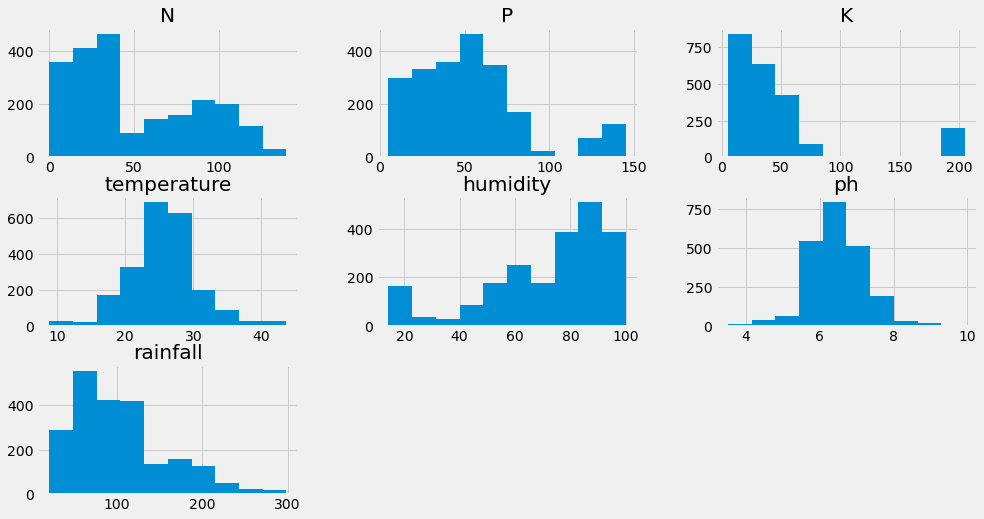

In [190]:
# Univariate Histograms
df.hist()
plt.show()

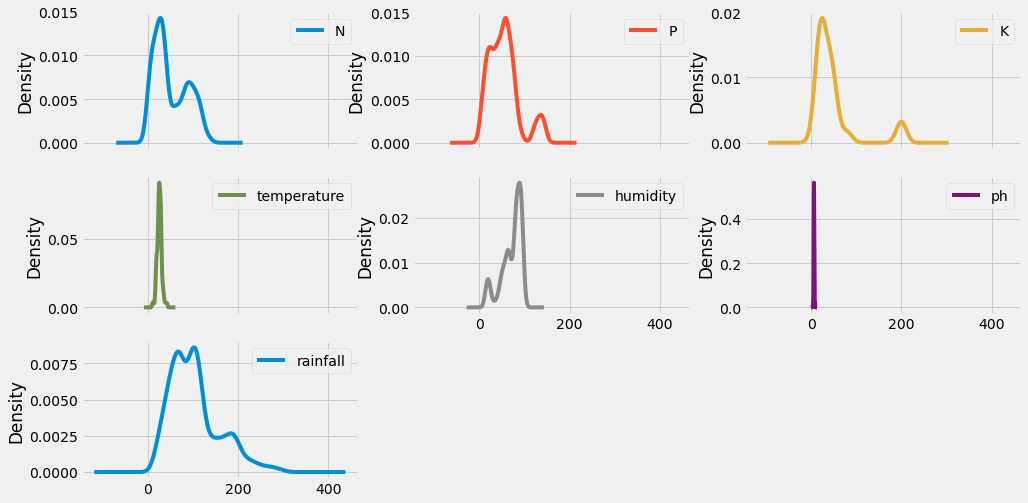

In [191]:
# Using Univariate Density Plots to check the distribution of Agricultural Conditions

df.plot(kind='density', subplots=True, layout=(3,3))
plt.show()

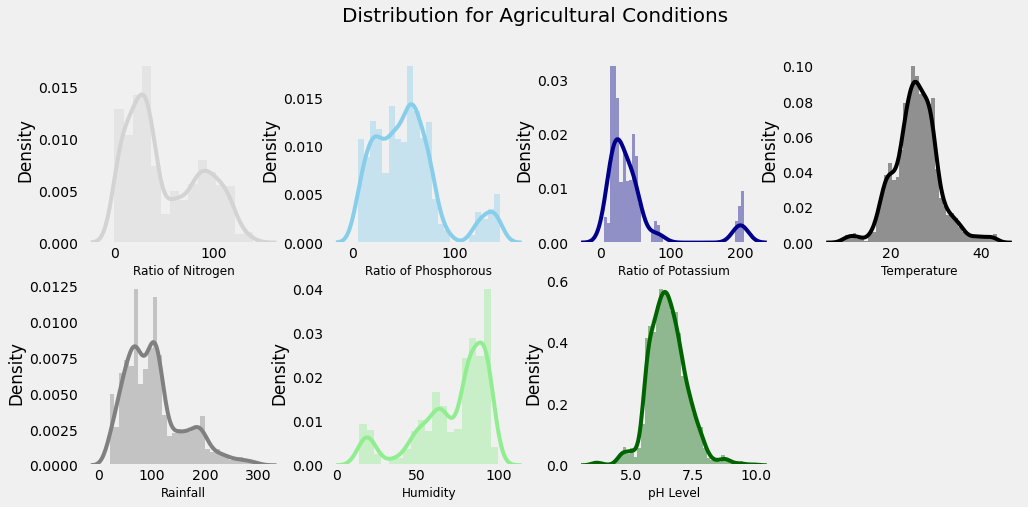

In [192]:
### Alternative Method to check the distribution of Agricultural Conditions Using  Univariate Density Plots

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(df['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

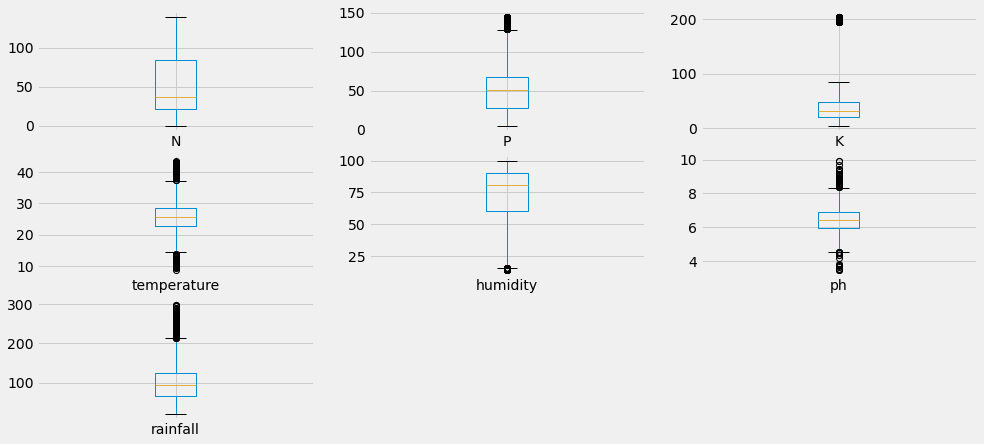

In [193]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(3,3))
plt.show()

### Multivariate Plots

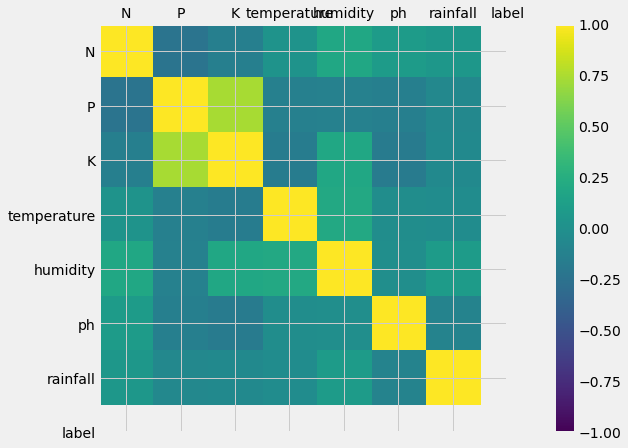

In [194]:
# Correlation Matrix Plot

names = df.columns
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

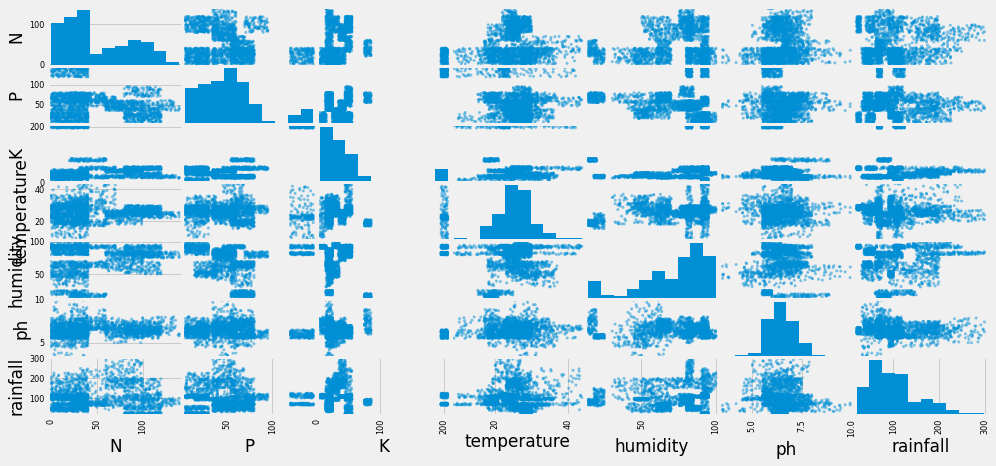

In [195]:
# Scatterplot Matrix

pd.plotting.scatter_matrix(df)
plt.show()

### Visualizing the Hidden Patterns

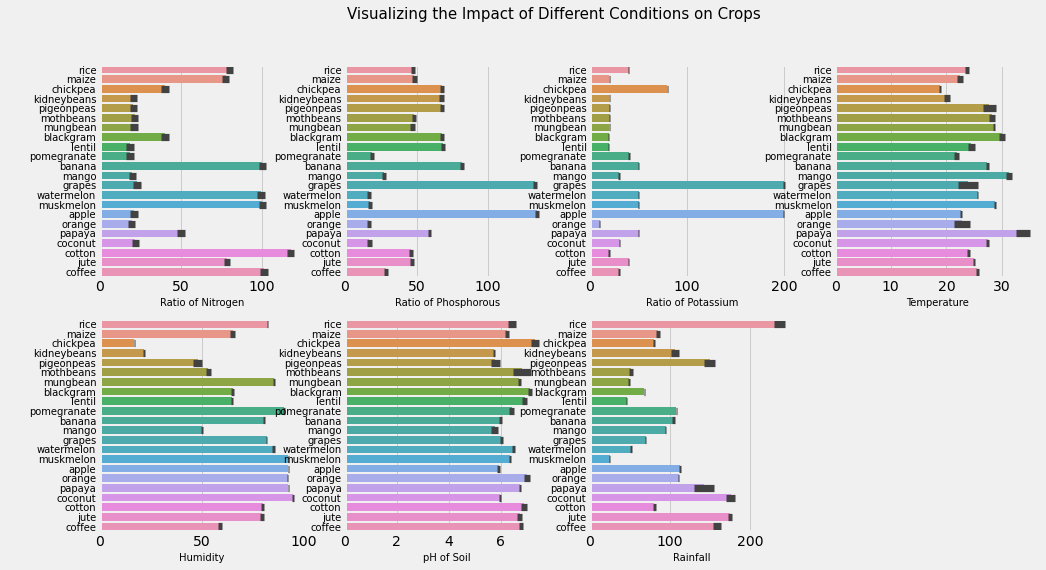

In [196]:
### Visualizing the Impact of Different Conditions on Crops

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(df['N'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(df['P'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(df['K'], df['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(df['temperature'], df['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(df['humidity'], df['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(df['ph'], df['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(df['rainfall'], df['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

# 3. Prepare Data


## 3a) Data Cleaning (missing values)


In [197]:
# lets check if there is any missing value present in the dataset

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 3b) Feature Selection (Features to choose)

In [198]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier

array = df.values
# separate array into input and output components
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)

my_scores = pd.DataFrame([model.feature_importances_], columns = df.columns[0:-1], index = ["Importance:"]) # data = scores, columns = attribute names
print(my_scores.round(2).to_string())

               N    P    K  temperature  humidity       ph  rainfall
Importance:  0.1  0.1  0.2      9.0e-02       0.2  6.0e-02       0.2


 ###### **Above the importance score of each attribute are given. The highest and most important attributes are Potassium(K), Humidity  and Rainfall.**


# 4. Evaluate Algorithms
## 4a) Split-out validation dataset (training vs. testing data)

#### Train and Test Sets
Randomly spliting the observations into 67% training data and 33% test data. Calibrating the model on the training data and evaluating its performance on the test data.

In [251]:
# Evaluate using a train and a test set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
array = df.values

X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0  # fix seed
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 94.766%


#### k-fold Cross-Validation¶

In [200]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = df.values

X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 31.591% (19.567%)


The result  shows a mean accuracy of about 31.591% and a standard deviation of about 19.567%.




## 4b) Test options and evaluation metric (We use accuarcy for classification)


### Classification Metrics
**In this project, we are faced with a Classification  problem; the choice of crops will be predicted based on the Agricultural conditions or explaining variables such as N, P, K, temperature, Humidity, ph, and rainfal**.

######  For the classification metrics, we will use the Logistic Regression algorithm  

#### Classification Accuracy

In [201]:
# Cross Validation Classification Accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=20)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.620 (0.362)


###### Using k = 20 ,  I found out that about 62% of the predictions are accurate. 
###### I observed that the more you split the data across validation the better the accuracy. That is an increase in the k-fold leads to better performance 

#### Confusion Matrix

In [252]:
# Cross Validation Classification Confusion Matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
print("Accuracy = ",round(accuracy_score(Y_test, predicted),2))
#print(predicted)

[[31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  1  0 29  1  0  0  2  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

#### Classification Report 

In [203]:
#Classification Report for Decision Tree

from sklearn.tree import DecisionTreeClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,Y_train)
predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))


DecisionTrees's Accuracy is:  88.1542699724518
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.00      0.00      0.00        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.94      0.97        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       1.00      0.23      0.37        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.90      0.93      0.92        29
       mango       1.00      0.93      0.96        29
   mothbeans       0.91      0.54      0.68        39
    mungbean       0.94      1.00      0.97        31
   muskmelon       0.97      1.00      0.98        31
      orange       1.00      1.00 

In [253]:
#Classification Report for Logistic Regression (LR)

from sklearn.linear_model import LinearRegression
array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
predicted_values = model.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

print("LR Model's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))

LR Model's Accuracy is:  94.76584022038568
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.97      0.91        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      0.97      0.98        30
      coffee       1.00      1.00      1.00        32
      cotton       0.82      1.00      0.90        28
      grapes       1.00      1.00      1.00        33
        jute       0.79      0.84      0.81        31
 kidneybeans       0.94      1.00      0.97        30
      lentil       0.96      0.92      0.94        26
       maize       0.96      0.79      0.87        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.74      0.85        39
    mungbean       0.97      1.00      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00     

## 4c) Spot Check Algorithms (test different models)


###  Classification Algorithms
#### Linear Machine Learning Algorithms
##### Logistic Regression

In [204]:
# Logistic Regression Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=20)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6195454545454546


The mean estimated accuracy is about 62%. 


### Non-Linear Machine Learning Algorithms
#### k-Nearest Neighbors

In [205]:
# KNN Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=20)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76


The mean estimated accurancy is about 76%.

#### Classification and Regression Trees

In [206]:
# CART Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sklearn as sk

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=20)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean(),3))

0.766


The mean estimated accuracy is given by 76%.

## 4d) Compare Algorithms (select best model)

LR: 0.619545 (0.362159)
LDA: 0.749545 (0.337645)
KNN: 0.760000 (0.355446)
CART: 0.757727 (0.348329)
NB: 0.803182 (0.359272)
SVM: 0.001818 (0.003636)


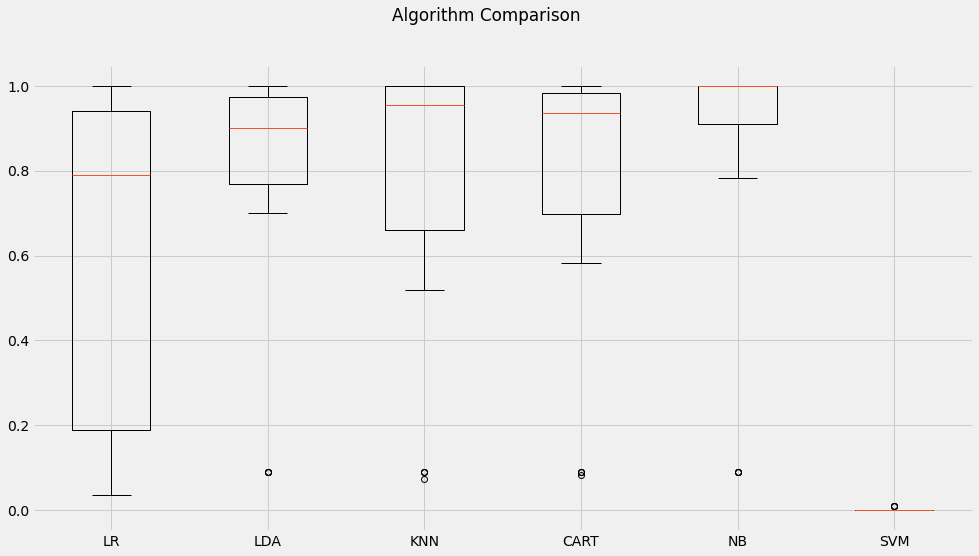

In [207]:
# Compare Algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits= 20)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

I found out that logistic regression (LR), the linear discriminant analysis (LDA) and the Classification and Regression Trees (CART) does not overfit the data and all performed well , the $k-$Nearest Neighbors (KNN) and the Naive Bayes (NB) performed well but they both overfit the data,  the Support Vector Machines (SVM) did not perform  well.

### Making predictions with selected Models (KNN and LR)

In [254]:
from sklearn.neighbors import KNeighborsClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)


KNN = KNeighborsClassifier()

KNN.fit(X_train,Y_train)



KNeighborsClassifier()

In [209]:
# lets check the Head of the Dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.9,82.0,6.5,202.9,rice
1,85,58,41,21.8,80.3,7.0,226.7,rice
2,60,55,44,23.0,82.3,7.8,264.0,rice
3,74,35,40,26.5,80.2,7.0,242.9,rice
4,78,42,42,20.1,81.6,7.6,262.7,rice


In [210]:
prediction = KNN.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [212]:
# lets check the Model for Oranges also
df[df['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.8,92.5,6.4,119.0,orange
1601,37,6,13,26.0,91.5,7.5,101.3,orange
1602,27,13,6,13.4,91.4,7.3,111.2,orange
1603,7,16,9,18.9,92.0,7.8,114.7,orange
1604,20,7,9,29.5,91.6,7.1,111.2,orange


In [213]:
# lets do some Real time Predictions
prediction = KNN.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)


The Suggested Crop for Given Climatic Condition is : ['orange']


In [214]:
from sklearn.linear_model import LogisticRegression

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

LR = LogisticRegression(solver='liblinear')

LR.fit(X_train,Y_train)


LogisticRegression(solver='liblinear')

In [215]:
# lets check the Head of the Dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.9,82.0,6.5,202.9,rice
1,85,58,41,21.8,80.3,7.0,226.7,rice
2,60,55,44,23.0,82.3,7.8,264.0,rice
3,74,35,40,26.5,80.2,7.0,242.9,rice
4,78,42,42,20.1,81.6,7.6,262.7,rice


In [216]:
prediction = LR.predict((np.array([[90,
                                       42,
                                       43,
                                       20.9,
                                       82.0,
                                       6.5,
                                       202.9]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [217]:
# lets check the Model for Oranges also
df[df['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.8,92.5,6.4,119.0,orange
1601,37,6,13,26.0,91.5,7.5,101.3,orange
1602,27,13,6,13.4,91.4,7.3,111.2,orange
1603,7,16,9,18.9,92.0,7.8,114.7,orange
1604,20,7,9,29.5,91.6,7.1,111.2,orange


In [218]:
# lets do some Real time Predictions
prediction = LR.predict((np.array([[37,
                                       6,
                                      13,
                                       26.0,
                                       91.5,
                                       7.5,
                                       101.3]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)


The Suggested Crop for Given Climatic Condition is : ['orange']


# 5. Improve Accuracy
## 5a) Algorithm Tuning (tune hyperparameters)


### Bagging Algorithms
#### a. Bagged Decision Trees

In [259]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

kfold = KFold(n_splits=20)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7740909090909092


#### There was a slight  improvement in the CART model from 0.765 to 0.774

#### b. Random Forest

In [220]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

num_trees = 100
max_features = 3
kfold = KFold(n_splits=20)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7822727272727273


### Boosing Algorithms
#### a.  AdaBoost

In [221]:
# AdaBoost Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]

num_trees = 30
kfold = KFold(n_splits= 20)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.05909090909090908


#### b. Stochastic Gradient Boosting

In [260]:
# Stochastic Gradient Boosting Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]
#change in number of tree from 100 to 20 because of delay in processing 
num_trees = 20
kfold = KFold(n_splits=20)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7236363636363635


#### It was observed that with 10 trees, the result  was 0.702 while with 20 trees the result was 0.724

## 5b) Ensembles (combine different models)

### Voting Ensemble
#### Using the class VotingClassifier for an average of the logistic regression (LR), CART and SVM.

In [261]:
# Voting Ensemble for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]
kfold = KFold(n_splits=20)

# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.6813636363636364


### Summary:
 After comparing the Algorithms in section 4d, it was shown that the logistic regression(LR) does not overfit the data and performed well at about 62 %. It was therefore selected as the best model. However, a combination of different  models  with LR increased  the accuracy  to 68 % as shown above

# 6. Finalize Model
## 6a) Predictions on validation dataset (final predictions)


In [224]:

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LR.predict(data)
print(prediction)

['coffee']


In [234]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = LR.predict(data)
print(prediction)

['jute']


## 6b) Create standalone model on entire training dataset (complete final model)

In [226]:
# Using Voting Ensemble for Classification as final model for predictions
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = df.values
X = array[:,[0,1,2,3,4,5,6]]
Y = array[:,7]
kfold = KFold(n_splits=20)

test_size = 0.33
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))




# create the ensemble model
ensemble = VotingClassifier(estimators)

# fitting the data into the model
ensemble.fit(X_train,Y_train)


# making prediction with the ensemble model
prediction = ensemble.predict((np.array([[90,
                                       42,
                                       43,
                                       20.9,
                                       82.0,
                                       6.5,
                                       202.9]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)


The Suggested Crop for Given Climatic Condition is : ['rice']


In [227]:
# lets check the Head of the Dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.9,82.0,6.5,202.9,rice
1,85,58,41,21.8,80.3,7.0,226.7,rice
2,60,55,44,23.0,82.3,7.8,264.0,rice
3,74,35,40,26.5,80.2,7.0,242.9,rice
4,78,42,42,20.1,81.6,7.6,262.7,rice


In [229]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = ensemble.predict(data)
print(prediction)

['coffee']


In [237]:
data = np.array([[90, 42, 43, 20.9, 82.0, 6.5, 202.9]])
prediction = ensemble.predict(data)
print(prediction)

['rice']


In [238]:
# lets check the Model for Oranges also
df[df['label'] == 'orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.8,92.5,6.4,119.0,orange
1601,37,6,13,26.0,91.5,7.5,101.3,orange
1602,27,13,6,13.4,91.4,7.3,111.2,orange
1603,7,16,9,18.9,92.0,7.8,114.7,orange
1604,20,7,9,29.5,91.6,7.1,111.2,orange


In [239]:
# lets check the Model for Oranges again
df[df['label'] == 'orange'].tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1695,27,30,5,32.7,90.5,7.7,113.3,orange
1696,13,8,12,25.2,92.5,7.1,114.3,orange
1697,6,7,7,27.7,94.5,7.2,114.0,orange
1698,40,17,15,21.4,90.9,7.9,107.1,orange
1699,31,26,9,11.7,93.3,7.6,103.2,orange


In [240]:
data = np.array([[40, 17, 15, 21.4, 90.9, 7.9, 107.1]])
prediction = ensemble.predicWe t(data)
print(prediction)

['orange']


# 7. Limitations / Conclusion  

- Split or k-fold was increased from 10 to 20 for better model performance    
- Data was already  prepared  and this might have some bias
- we observed the correlation between  the agricultural conditions ( notably P and K= 0.7,  rainfall and ph = -0.1)
- For each crop, we found out the minimum, average, and maximum agricultural  conditions  for its optimum  growth     
- We compared the average requirement for each crop with average agricultural conditions  
- We discovered  crops that can only be grown in the summer season, winter season, and rainy season     
- The highest and most important attributes or agricultural  conditions  are Potassium(K), Humidity  and Rainfall.  
- Logistic regression(LR) was selected  among the models as the best because it does not overfit the data and it performed well  
- A combination of different models with LR led to the formation of the final model **ensemble**  as it increased the accuracy from 62 % to 68 %  

# 8. Sources

- https://www.kaggle.com/amanrosekaursethi/crop-analysis-clustering-and-prediction/data
- Lecture by Prof. Dr. Schanbacher